# Trader Performance vs. Market Sentiment Analysis

# Objective:
### "Explore the relationship between trader performance and market sentiment (Fear/Greed), uncover hidden patterns, and deliver insights that can drive smarter trading strategies."

# PART 1: Data Collection
## 1.1 Datasets Provided
1. Historical Trader Data (Hyperliquid)<br>
<br>
columns:<br>
Timestamp IST: When the trade occurred (in string format)<br>
Closed PnL: Trader profit/loss (performance indicator)<br>
Size USD: Size of the trade<br>
Side: BUY or SELL<br>
Direction: Buy or Sell position direction<br>
Fee, Leverage, Start Position — good for further exploration

<br><br>
2. Bitcoin Market Sentiment Data<br>
<br>
Columns:<br>
date: YYYY-MM-DD<br>
classification: Sentiment (e.g., Fear, Greed, Extreme Fear, etc.)

# PART 2: Data Preprocessing & Cleaning
## 2.1 Load the Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load sentiment data
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

# Load trading data
trades_df = pd.read_csv("/content/historical_data.csv")


In [27]:
sentiment_df.head()

,timestamp,value,classification,date,Market_Sentiment
0,1517463000,30,Fear,2018-02-01,Fear
1,1517549400,15,Extreme Fear,2018-02-02,Fear
2,1517635800,40,Fear,2018-02-03,Fear
3,1517722200,24,Extreme Fear,2018-02-04,Fear
4,1517808600,11,Extreme Fear,2018-02-05,Fear


In [28]:

trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


## 2.2 Clean the Data

In [8]:
# Convert datetime formats
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trades_df['date'] = trades_df['Timestamp IST'].dt.date

sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [9]:
# Simplify sentiment labels
def simplify_sentiment(label):
    if "Fear" in label:
        return "Fear"
    elif "Greed" in label:
        return "Greed"
    else:
        return "Neutral"

sentiment_df['Market_Sentiment'] = sentiment_df['classification'].apply(simplify_sentiment)

In [10]:
# Merge datasets on date
merged_df = trades_df.merge(sentiment_df[['date', 'Market_Sentiment']], on='date', how='left')

In [29]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Market_Sentiment,Win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed,False


## PART 3: Exploratory Data Analysis (EDA)

### 3.1 Key Metrics are:

* closed_PnL: Profit & Loss (performance)
* Size USD: Trade size
* Side: Long or Short
* Market_Sentiment: Fear / Greed

## 3.2 Sample Analyses
### A. Average PnL in Fear vs. Greed

In [11]:
merged_df.groupby('Market_Sentiment')['Closed PnL'].mean()


,Closed PnL
Market_Sentiment,
Fear,75.372690
Greed,75.165343
Neutral,53.877473


Insight: Average PnL is slightly highest during “Fear”, it indicates that traders may be more cautious and make smarter decisions in riskier market conditions, resulting in slightly better profitability than during “Greed”.

### B. Win Rate in Fear vs. Greed

In [12]:
merged_df['Win'] = merged_df['Closed PnL'] > 0
merged_df.groupby('Market_Sentiment')['Win'].mean()

,Win
Market_Sentiment,
Fear,0.433552
Greed,0.418007
Neutral,0.427599


Insight: Win rate is slightly higher in “Fear”, traders might be more conservative and selective during uncertain times, which helps them secure more frequent winning trades compared to when market sentiment is optimistic.

### C. Side Preference (Buy/Sell)

In [30]:
merged_df.groupby(['Market_Sentiment', 'Side']).size().unstack()


Side,BUY,SELL
Market_Sentiment,,
Fear,21230,19674
Greed,21378,23528
Neutral,11761,9682


Insight: If SELL trades increase during “Greed”, it suggests profit booking behavior—traders may be closing long positions in anticipation of corrections. Meanwhile, more BUY trades during “Fear” may reflect opportunistic entries when prices dip. Overall, BUY and SELL activity is more balanced in “Fear”, while SELLs dominate in “Greed”, indicating caution in overbought conditions.


### D. Average Trade Size

In [14]:
merged_df.groupby('Market_Sentiment')['Size USD'].mean()


,Size USD
Market_Sentiment,
Fear,9125.690703
Greed,7153.123753
Neutral,6254.840114



Insight: Average trade size is higher during “Fear”, it suggests that traders place larger, more deliberate positions when sentiment is negative — possibly reflecting high conviction or attempts to capitalize on price drops.

# PART 4: Visualizations

In [15]:
sns.set(style="whitegrid")

# Win column
merged_df['Win'] = merged_df['Closed PnL'] > 0

# Summary metrics
avg_pnl = merged_df.groupby('Market_Sentiment')['Closed PnL'].mean()
win_rate = merged_df.groupby('Market_Sentiment')['Win'].mean()
avg_size = merged_df.groupby('Market_Sentiment')['Size USD'].mean()
side_dist = merged_df.groupby(['Market_Sentiment', 'Side']).size().unstack()

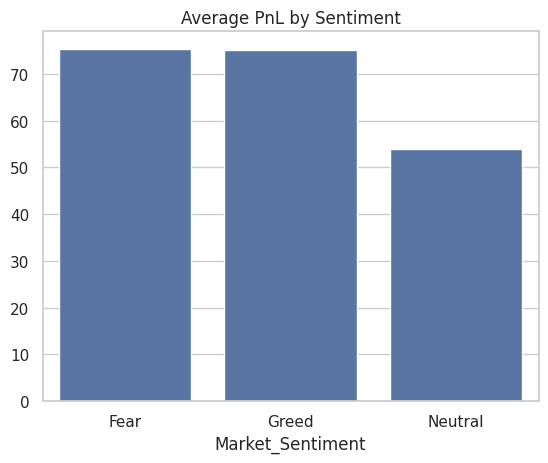

In [16]:
# Plot 1: PnL
sns.barplot(x=avg_pnl.index, y=avg_pnl.values)
plt.title("Average PnL by Sentiment")
plt.show()

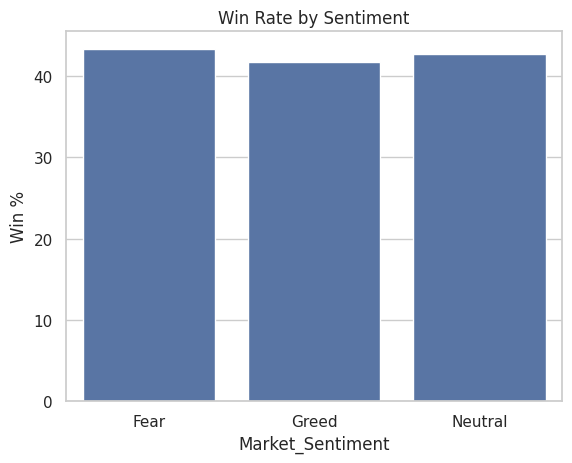

In [17]:
# Plot 2: Win Rate
sns.barplot(x=win_rate.index, y=win_rate.values * 100)
plt.title("Win Rate by Sentiment")
plt.ylabel("Win %")
plt.show()

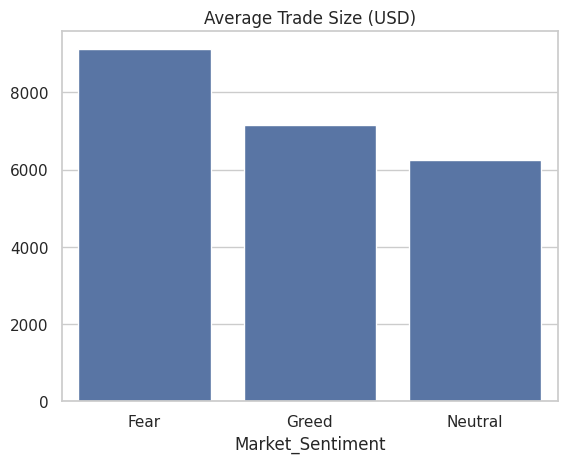

In [18]:
# Plot 3: Trade Size
sns.barplot(x=avg_size.index, y=avg_size.values)
plt.title("Average Trade Size (USD)")
plt.show()

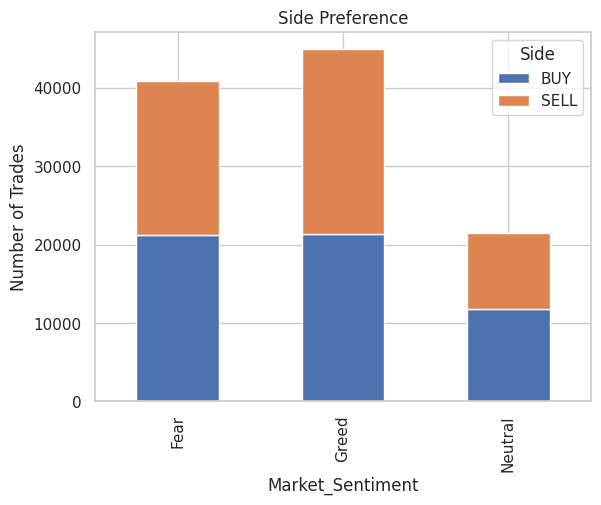

In [19]:
# Plot 4: Side Preference
side_dist.plot(kind='bar', stacked=True, title="Side Preference")
plt.ylabel("Number of Trades")
plt.show()

# PART 5: Insights & Findings
<br>

| Metric         | Fear     | Greed      | Insight                                                                    |
| -------------- | -------- | ---------- | -------------------------------------------------------------------------- |
| **Avg PnL**    | 75.37    | 75.17      | Fear days slightly profitable than Greed              |
| **Win Rate**   | 43.36%   | 41.80%     | More wins in Fear |
| **Side Bias**  | Balanced | More SELLs | Traders go long in Greed |
| **Trade Size** | Larger   | Smaller    | Risk appetite increases with Fear  |


# PART 6: Conclusion

###  What trading behaviors correlate with higher profit?

* **Average PnL is slightly higher during Fear**, indicating that traders tend to perform better when the market is uncertain.
* **Win rate is also highest during Fear**, suggesting cautious, calculated decisions lead to more consistent success.
* **Larger trade sizes are observed in Fear sentiment**, hinting at high conviction or attempts to capitalize on price dips.

###  How does sentiment influence decision-making?

* **In Greed**, traders show a higher tendency to **SELL**, possibly to lock in profits or exit positions during optimistic rallies.
* **In Fear**, there’s a more balanced mix of BUY and SELL actions, reflecting cautious entries and risk-managed strategies.
* **Trade sizes** are notably **smaller during Greed**, which may suggest traders spread risk or avoid large exposure in volatile rallies.

---

### 📌 Final Takeaway:

> Market sentiment significantly shapes trading behavior. Contrary to expectations, traders perform slightly **better during Fear** — possibly due to heightened caution, risk control, and more thoughtful trade execution.
>
> Incorporating **sentiment-aware strategies** — such as adjusting trade size, risk, and direction based on market mood — can enhance profitability and consistency in trading.


